# Practicalities

## Conda

[Conda](https://docs.conda.io/en/latest/) is a combined package and environment manager with a focus on Python (but not exclusively so anymore). "Environments" have been part of the Python microcosmos for some time and in various incarnations; the idea is to "isolate" as much as possible one particular installation of Python, including an interpreter and any possibly installed third-party extensions. An environment consists of a folder inside of which the typical Linux file system structure is replicated.

Environments need to be
- created (once)
- activated (every time you want to use them)

The rationale for using these "quarantined zones" is that it is quite common to have several different versions of Python interpreters (we will talk about what that is shortly) installed on your system, with various levels of restrictions. Most operating systems these days come with a Python interpreter pre-instaled, so that in principle you could just use that one. However, in some cases (e.g. MacOS), the built-in Python is a special version with OS-specific capabilities (on the Mac, you could use Python together with the built-in version to write full-fledged MacOS GUI applications), but also limitations, e.g. on where you can install third-party libraries. On MacOS, the relatively new "System Integrity Protection (SIP)" means you can't install libraries in the places Python would like to install them, resulting in all kind of workarounds becoming necessary. Also, you might sometimes want a really brand-new version of Python, which is also not likely to be the one that comes with your OS.

It should maybe be pointed out that if you're using a Conda environmnet (i.e. a folder, typically in a specific place within the file system tree in which Conda itself resides), that does not mean everything you work on has to happen inside that folder - far from it. Personally, I leave these environment folders completely untouched and put my code in some other place.

When you **activate** and environment, this simply means that a few file system paths are placed before any others onto the search path, both for the general shell environment and Python itself.

With that background, here a couple of examples:

1. Create an environment:
```
conda create -n <name>
```

2. Activate an environmnet:
```
conda activate <name>
```

3. Install a third-party module
```
conda install [-c <channel>] <name>
```

Note that if an environment is activated, the install command will install **into the activate environment.** Otherwise, you can give it a `-n` switch to tell it into which environment to install.

## Jupyter / IPython

The [Jupyter](https://jupyter.org/) set of tools consists of several "frontends" to work interactively with Python, of which I will briefly mentione 2: the [console](https://jupyter-console.readthedocs.io/en/stable/), and the [notebook](https://jupyter-notebook.readthedocs.io/en/stable/index.html).

### Console

The console (`jupyter console`) and [IPython](https://ipython.readthedocs.io/en/stable/) are identical in that the Jupyter console internally uses IPython as the outward-facing frontend. IPython stands for "interactive Python" and is a REPL shell similar to the one built into the Python interpreter, but with enhanced capabilities (better tab completions, history, post-mortem debugger and many others). The difference between evoking `ipython` and `jupyter console` on the command line is that Jupyter separates the frontend from the Python "kernel", allowing several frontends (e.g. both a console and a notebook) to connected to the same kernel.

### Notebook

... is what we're using right now, and hopefully you will get a sense of how they work as we go along.

### A trick for all of the above

One particularly useful trick for IPython / Jupyter is the following: use `_` (single underscore) to refer to the result from the previous line, and `__` (double underscore) for the one before that (I believe in Matlab you could use `ans` or something along those lines). In fact, all results are kept in the list `Out` and can be referenced again later by index (e.g. `Out[243]`) as indicated at the beginning of each line of output (see below).

# Introduction

Python, as a language, is
- interpreted language
- dynamically typed

## Compilers vs. Interpreters

A **compiler** is a program that takes source code as input and produces an **executable** file which can be loaded and run directly by a computer's operating system. The compiler is typically specific to a particular computing platform and produces (in general) only executables for that particular platform.

An **interpreter** is a program that takes a text file which contains programmatic statements and exectues them immediately. The interpreter, like the compiler, is specific to a particular platform. 

In both cases, the code is (more or less) independent of the platform, but in the case of an interpreted language, it can be executed immediately on any platform, as long as a corresponding interpreter is available.

The program you usually call be executing `python` on the command line is the Python interpreter. Like with some, but by no means all, other scripting languages, the Python interpreter doubles as a **"shell"**. That is, there are two fundamental modes of working with Python:

1. run a script: `python script.py`
2. work interactively (**'REPL'**): `python`

The terms 'interpreted language' and 'scripting language' are synonymous (I think). 'Shells' such as *bash* work essentially in the same way as Python.

### A note on running scripts in general (which you'll probably never do...)

In general, script files of all kinds can be executed on \*nix architectures by setting the right permissions (`chmod 755 script.py`) and calling them with the `./` prefix. For the operating system to know which interpreter to invoke, you can give the script a **"shebang"** line at the very top:
```python
#!/usr/bin/env python
```
This is not needed if you call the script excplicitely with the Python interpreter:
```python
python script.py
```
The shebang line can be useful if you want to make sure the script gets executed by a specific Python interpreter, e.g. one associated with a specific *conda* environment:
```python
#!/path/to/a/specific/python
```

(The line `#!/usr/bin/env python` actually asks the current shell environement for the location of the Python interpreter and will substitute the correct one if a particular conda environment is activated.)


## What is a variable?
### in mathematics:
- a symbol which we imagine to be able to take on an arbitrary value
    - sometimes, it stands for *all* the values it can take on
    - sometimes, it stands for *a particular* value which we don't know explicitely

### in programming:
- a memory location that holds a given value at a given time
- that can be overwritten with a different value at any time

Many programming languages require you to **declare** variables before you can use them. That means in particular:
- declare the variable to be of a certain **type**
- declare the variable **"shape"** (in the case of **arrays**)
- in the case of static memory allocation, also the **size**

Python does not require you to declare variables; instead, it **infers** a lot of what it needs to know:

In [2]:
# This statements assigns the value '5' to the name 'a'
a = 5

Btw, the line starting with `#` above is a **comment** - text that is ignored by the Python interpreter.

In [4]:
# Python infers that the number should be interpreted as an integer
type(a)

int

In [5]:
# If you wanted it to be represented as a float, you would write
a = 5.
type(a)

float

Unlike in other scripting languages, you don't even have to declare that `a` **is** a variable. In JavaScript, for example, you'd have to write:
```javascript
var a = 5
```

Moreover, you can assign variables at any given place in a script or module, unlike in some compiled languages which require you to declare all variables at the beginning of a program. The reason why compiled languages often require you to declare variables at the beginning of the program is because the operating system needs to know how much memory the program requires to run. Any variable defined in the program takes up a memory location. 

## Memory allocation and garbage collection

A program can also request memory from the operating system while it is already running: this is called **dynamic memory allocation** and is pretty much how most programs operate nowadays. In fact, under the hood, Python needs to request memory from the operating system every time you type something like `a = 5`.

Of course, dynamically allocated memory also needs to be freed again at some point, lest a program keep eating up more and more of the computer's available RAM (if that happens, it is called a *memory leak*). While many compiled programming languages require you to do the work of deallocating memory again yourself, Python uses **garbage collection** - it deallocates memory automatically if it determines it is no longer needed (how it does that is certainly beyond an introduction and need not concern you). 

(As a side note: statically declared variables do not need to be deallocated even in compiled languages; dynamic allocation is usually exclusively used for **arrays** of variables, a concept we will get to later.)

## Automatic typecasting

We have seen above that Python has a concept called **"type"** - e.g. a number can be a `float` or an `int`, and there are other basice types such as strings (`str`). Any memory location holds only a sequence of `0`s and `1`s, and in order for such sequences to "mean" anything, knowledge of what is represented is necessary; such knowledge is represented by the informations **"type"**. The same binary sequence in computer memory may represent different numbers depending on whether its associated type is "integer" or "floating point", and re-interpreted as a character, it will most obviously correspond to something completely different.

Luckily, in Python, we don't need to worry about that. With other languages, a problem might arise if we tried to perform a mathematical operation on differently typed numbers:

In [10]:
1 + 2.5

3.5

Even though we saw before that Python automatically assigns the type `int` to the a number typed as `1` and the type `float` to a number typed as `2.5`, it does not complain when we try to add them. Instead, it realizes that it needs to **cast** the number `1` to a `float` before adding it to `2.5`.

As a result, Python is incrediblty convenient to use - we hardly need to think more deeply about what we're doing. Nonetheless, it is often the case that errors arise from insufficient understanding of what's going on behind the scenes.

On final example of the `float`/`int` issue:

In [13]:
3 / 2

1.5

The operator `/` corresponds to division as we would normally understand it. Note, though, that both `1` and `2` are `int`s, whereas the result needs to be a `float` - again Python does the correct thing.

There is however another operator, `//`, which corresponds to "integer divison" (i.e. an integer result without the "remainder"):

In [14]:
3 // 2

1

Its result is again an `int`:

In [15]:
type(3 // 2)

int

## Mathematical operators in Python

The following operators are available:
- `+`, `-`, `*`, `/` - with the usual meaning
- `**` represents exponentiation
- `1j` represents the imaginary unit ($\sqrt{-1}$)
- `//` represents integer division and `%` the modulo operator (returns the remainder)

In [18]:
3 % 2

1

# Functions (1)

Functions take arguments and return values; we will refine this concept as we go along.

In [19]:
def pourquoi(pas):
    return pas

The keyword `def` tells the Python interpreter that what follows is a function definition; `pourquoi` is the name of the function, and `pas` is its argument. The name of the function and of the arguments is completely up to you.

The function `pourquoi` does nothing but return its argument, whatever that may be:

In [23]:
pourquoi(5) # an int

5

In [ ]:
pourquoi(3.14) # a float

In [24]:
pourquoi('moi') # a string

'moi'

# Python style elements (1)

## 1. Indentation

Now that we have seen a function definition, some comments on Python syntax are in order.

Programming languages usually need a way to express that a number of code lines belong together - e.g. the body of a function. Such functionally coherent pieces of code are usually called "blocks" and occur naturally in a variety of circumstances which we will encounter in due course. 

Many languages use parentheses/brackets to surround blocks of code; Python uses **indentation**. Lines of code which are indented with respect to preceding ones belong to a block. This grew out of programmers' practice to indent code in order to make it more legible (parentheses get very confusing very quickly - try *Lisp* for a taste!).

In Python, this practice has been turned into a **functional** element of the syntax. **<span style="color:red">It does not matter what characters (tab or spaces) you use to indent your code - <span style="color:green">but</span> it must be consistent across your file.</span>
**

The other element of style to note is the **colon** after the first line of the function definition. I don't think indented code blocks in Python ever occur without the colon, and it probably is simply another element meant to make the code more readable to humans (i.e. signify that what follows is a function definition).

## 2. Quoted strings

If you executed our function in the following way

In [25]:
pourquoi(moi)

NameError: name 'moi' is not defined

you get an error message. Unlike before, we didn't quote the `moi` this time. Unquoted names in Python refer to variables and other objects (definition forthcoming) which reside in the computer's memory; but `moi` has never been defined before.

To be precise, Python has, again, interpreted what we wanted to do automatically. We could also have written:

In [26]:
a = 'moi'
pourquoi(a)

'moi'

In fact, we could use:

In [28]:
moi = 'toi'
pourquoi(moi)

'toi'

**Now** we have defined `moi`; we have assigned the *string* "toi" to the variable `moi`. As mentioned before, strings have the type `str` in Python:

In [29]:
type(moi)

str

Strings are denoted by surrounding them with quotes. **<span style="color:red">It does not matter whether you use single or double quotes.</span>**

If you need to quote something **inside** a quote, use the respective other type of quote character, i.e. `"'this' being quoted"` is equivalent to `'"this" being quoted'`. (If more levels of quoting are necessary, it usually depends on the particular purpose what kind of *"escaping"* needs to be applied.)

## 3. Comments

If you want to comment your code, use the character `#`. Everything between the `#` and the end of the line will be ignored by the interpreter. (I.e. you can use it at the beginning of the line, but also after some code; there is no multiline-comment in Python.)

## 4. `None`

Many languages have a special keyword reserved to denote "nothing" (often, it is called `null` or variants thereof). In Python, the "nothing" keyword is `None` (with capital "N"). We will see it in the wild shortly.

## 5. Capitalization

Capitalization matters in the sense that the name `A` and the name `a` will refer to distinct entities. However, in terms of "style", you are free to use capital and lower-case letters in any combination you desire.

## 6. Whitespace

Whitespace is ignored - places as many or as few spaces between other language elements as you like:

In [30]:
a=5
a

5

In [32]:
a                           =                          7
a

7

# Functions (2)

Your function can have an arbitrary number of elements:

In [33]:
def func(a, b):
    return a + b

Functions often return a value (its *return value*). In other languages, something that doesn't return a value but is "called" in the same way as a function is usually called a *subroutine*. Python keeps things simple and only uses one concept. The return value of the function is denoted, inside the function definition, by the keyword `return`. If your function is really a subroutine, you can just leave out the `return`, although, in that case, Python will automatically return the value `None` (another reserved word in Python). You could also explicitely write `return None`.

Btw, the return value of a function can (obviously) be assigned to a variable:

In [34]:
c = func(3, 4)
c

7

A little example of what is **not** possible:

In [35]:
func(3, 'word')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

The function takes two arguments and adds them; naturally, strings and numbers really can't be added together even with automatic typecasting (there's no way to turn a string into a number in the same way an `int` can be re-interpreted as a `float`). Python therefore throws a correspondingly named `TypeError`.

## Function arguments

There are two ways of handing arguments to functions in Python:
1. as an ordered sequence
2. with "keywords"

In the first case, Python looks at the order in which the arguments appear in both the definition and the later call in order to determine which is which:

In [36]:
def func(arg1, arg2, arg3):
    # 'print()' and 'format()' are built-in functions - later :P
    print("First argument: {}, second argument: {}, third argument: {}".format(arg1, arg2, arg3))
    
func('one', 2, 3.)

First argument: one, second argument: 2, third argument: 3.0


With the same function definition, you could use the names you have given your function's arguments when you call it:

In [38]:
func(arg2='eins', arg1='zwei', arg3='drei')

First argument: zwei, second argument: eins, third argument: drei


In which case the order doesn't matter anymore, it is the **name** according to which the values are assigned to the arguments.

This is an uncommon use, however (obviously, since it requires more writing). Typically they are used for two other important scenarios:
1. **default values**
1. **optional arguments**

To define a function with an argument that posseses a default value:

In [39]:
def func(default=5):
    return default

If this function is called without an argument, the default value is substituted:

In [40]:
func()

5

(This demonstrates also how to call a function without any arguments.) If it is called **with** a value, that value takes precedence:

In [41]:
func('OMG')

'OMG'

Note also, that as with all variables in Python, the type of the variable will be determined automatically and need not be specified (and, in fact, can be different between function calls, if the body of the function is compatible with that).

The same syntax is used in order to denote that an argument is **optional**:

In [42]:
# Btw, this is a function that doesn't return anything - it just prints something to the output
def func(maybe=None):
    if maybe is not None:
        print("yes")
    else:
        print("no")

In [43]:
func()

no


In [44]:
func('hello')

yes


An argument with the default value of `None` is interpreted as optional. **<span style="color:red">Note, however, that it is up to the function body to actually test whether the argument is present or not.</span>**

If a function has no argument (or optional ones that aren't used in the call), it is called with empty parentheses. **<span style="color:red">The parentheses after a name tell the interpreter to call the function, whether empty or not.</span>**

If you write just the name of the function without parentheses, you are simply *referring* to a named object and Python will simply tell you what it is:

In [84]:
func

<function __main__.func>

A function can combine both types of arguments:

In [45]:
def func(a, b, c=None):
    d = a + b
    if c is not None:
        return d + c
    else:
        return d

In [46]:
func(1, 2)

3

In [48]:
func(4, 5, c=6)

15

If you supply the keyword argument at the same position as it occurs in the function definition, you don't actually need to supply the keyword when you call the funtion:

In [47]:
func(1, 2, 3)

6

Non-keyword arguments, on the other hand, are not optional, and if not supplied (**<span style="color:red">in the correct order</span>** or with name), will result in an error:

In [49]:
func(c=5)

TypeError: func() missing 2 required positional arguments: 'a' and 'b'

Also, your function's argument list must be ordered such that all **<span style="color:red">ordered arguements come before keyword arguments</span>**:

In [50]:
def func(a=None, b):
    pass

SyntaxError: non-default argument follows default argument (<ipython-input-50-7f27c601eebd>, line 1)

As you can see, Python's error messages are quite descriptive and usually tell you exactly what's wrong.

(The `pass` keyword can be used when syntax requires that there be *something* at a specific place in the code, but you don't really want to do anything. The function definition would not be recognized if there were no code whatsover in the indented block, but since this is a demonstration only we really don't need to perform anything, we `pass`...)

A final note: We have redefined the name "func" many times above. This is perfectly fine in Python: The most recent definition is the one that remains associated to the name "func". We will inspect this issue more later.

# Object Oriented Programming

Object orientated programming (OOP) is a programming *paradigm*. It doesn't describe a language per se and can be implemented in principle in any langauge, but many languages are built around this paradigm and provide corresponding elements and structures. Object orientation is a prominent feature of Python and useful in particular to keep your code well-structured and maintainable.

There are two key ideas in OOP which I will introduce here: **encapsulation** and **inheritance**. Furthermore, OOP is often associated with certain prescriptions on how to best handle errors and, more generally, "events".

## What is an object?

An *object* in OOP is an entity that encapsulates both data and functionality and keeps it separate from other objects. In Python, the idea of an object is represented by the concept of `class`. A class definition looks as follows:

```python
class Eagle:
    pass
```
This class, named "Eagle", does nothing of course (I used the keyword `pass` again, since for Python to accept the definition, there needs to be *something* on the indented line after the colon). In case you ever look at other people's code and get confused, I will mention here that in Python 2, there used to be "old style" and "new style" classes which differed in the way they were declared: `class Eagle():` for old style and `class Eagle(object):` for new style. Python 3 only has new style classes and it doesn't matter if you declare them with or without the `(object)` - however, the syntax with the parentheses **does** have a meaning and we will learn about that shortly.

We use objects in computing in order to group entities together that, in the programmer's opinion, belong together - the object *encapsulates* them. Entities, here, refer to data (i.e. variables) and functions.

Let us look at a more capable example:

In [56]:
class Person(object):
    def __init__(self, nationality):
        self.nationality = nationality

We will immediately need to take note of another concept in OOP: initialization. In order to initialize the `Person` object, you call it similar to how you call a function, and assign it to an **instance**:

In [57]:
Arno = Person('German')

The **instance** of the `Person` class has here been called `Arno`. What is Arno's personality?

In [58]:
Arno.nationality

'German'

### Instantiation

Why is the object referred to by the name of `Arno` an "instance"? Because the class represents, as the name suggests, a "class" of entities, which however can have many different "instances":

In [60]:
Simone = Person('Swiss')
Simone.nationality

'Swiss'

We have instantiated two different objects of class `Person`, each with its own, distinct attribute `nationality`. As you can see, you **access** the value of the attribute via the "dot-accessor" syntax which Python shares with many other object-oriented languages (e.g. Java). The same syntax allows you to change the value of the attribute after the object has been instantiated:

In [61]:
Simone.nationality = 'Chilean'
Simone.nationality

'Chilean'

However, one thing we cannot do is access this attribute from the object representing the class:

In [62]:
Person.nationality

AttributeError: type object 'Person' has no attribute 'nationality'

For this reason, attributes like `nationality` of `Person` are referred to as **instance variables**. Each instance will have a specific set of values associated with its instance variables, distinct from those of other instances of the same class. However, there also exists the concept of a **class variable** - one that **all** instances of a class share. They are expressed in the class definition as follows:

In [70]:
class Animal(object):
    phylum = 'Chordata'
    legs = None
    
Dog = Animal()
Cat = Animal()
Cat.phylum

'Chordata'

Class variables are declared immediately under the definition line and need to contain the assignment operator (`=`); for that reason, if a class variable has no value at the time of definition, assign `None` to it.

If a assign a number of legs to the object representing the class:

In [75]:
Animal.legs = 4
Dog.legs

4

In [76]:
Cat.legs

4

all instances will have the same number of legs. Btw, Python being Python, you can even give objects attributes after instantiation:

In [78]:
# an instance variable
Simone.hair = 'blond'
Simone.hair

'blond'

In [82]:
# which only applies to Simone
Arno.hair

AttributeError: 'Person' object has no attribute 'hair'

In [80]:
# a class variable
Person.genus = 'Homo'
Arno.genus

'Homo'

In [81]:
# which applies to everyone
Simone.genus

'Homo'

### Methods

As we have seen, objects (i.e. classes) encapsulate data in the form of class and instance variables. In particular as for the instance variables, this basically amounts to prescribing a common *structure* to the data, which can however be filled in with different values for each instance.

The second type of entity encapsulated by objects are functions; a function associated with a class is called a **method** (this difference in naming is really only to distinguish "stand-alone" functions from those associated with a class). Class methods are defined in the (indented) body of the class:

In [102]:
class Speaker(object):
    def greet(self, who):
        print('Hello {}'.format(who))

Methods are accessed in the same way as variables (with dot-accessor syntax), which is why both methods and variables together are generally referred to as `attributes`:

In [104]:
Me = Speaker()
Me.greet("Shelley")

Hello Shelley


Notice how the method definition references two arguments, whereas the call (`greet("Shelley")`) only has one. The first argument in a method definition is conventionally called `self`, although in principle you could name it however you want (but, don't... sticking to convention makes understanding other people's code a lot easier). It is the name which you can use in your internal method definitions to refer to the object instance itself. If you want to access an instance variable inside a method (which is more or less the whole point), you will simply access it from the `self` object. It is present in the method definition for that reason - so you can access the instance's variables and methods - but you do not give this argument when you call the method on an object instance; Python fills this in for you automatically. Method *calls* have therefore always one argument less than their definition.

With this knowledge, let us once more look at the original `Person`:

In [86]:
class Person(object):
    def __init__(self, nat):
        self.nationality = nat

The class declaration here contains also the definition of a method called `__init__`. This is a name that has a special meaning to the Python interpreter; by using it, you tell the interpreter that this method implements a particular operation - in this case the instantiation of the object. The `__init__` method is what the interpreter internally calls when you instantiate a class by calling its name. It is customarily used in order to populate whatever instance variables you want to populate on instance creating, and carry out any other tasks you deem necessary for that purpose. As with other methods, it receives the additional `self` in the definition so that you can attach the variables to the instance being created; and as with other methods, this argument is missing from the actual instantiation *call* (or rather, filled in automatically by Python).

(In general parlance, a method that initializes an object is also called a *constructor*.)

You may notice that the definition of `Speaker` did not contain an `__init__` method. This is so because Python, under the hood, will always provide a default implementation; so even if you don't define it, it is there - you just don't have an opportunity to populate instance variables in that case.

The mechanism by which Python provides a default constructor is the second aspect of OOP I want to talk about: inheritance.

### Class inheritance

Inheritance provides a way to structure your code such as to keep the need to repeat yourself to a minimum. Again, an example will make this more digestible:

In [87]:
class Animal(object):
    def eat(self, fodder):
        print("I'm eating {}".format(fodder))
        
class Dog(Animal):
    def bark(self):
        print("Woof!")
        
class Cat(Animal):
    def meow(self):
        print("Meow!")

In this example, `Dog` and `Cat` **inherit** from `Animal`. Another frequently used way to express this is to say that `Cat` and `Dog` are **subclasses** of `Animal`.

Subclasses inherit functionality (and variables, examples of which we have left out here for simplicity) from their *parents*. All Animals eat:

In [89]:
Waldi = Dog()
Waldi.eat('sausage')

I'm eating sausage


In [94]:
Mimi.eat('fish')

I'm eating fish


But only cats meow:

In [91]:
Mimi = Cat()
Mimi.meow()

Meow!


And only dogs bark:

In [96]:
Waldi.bark()

Woof!


**<span style="color:red">The parent class is given in parentheses in the class definition.</span>** Which also tells you where the `object` in the basic class definition comes from: It's the most "basic" object there is in Python, from which all other objects inherit. This `object` class comes with some basic functionality common to all objects in Python, including an `__init__` method, so that even classes defined without on can be instantiated without problem.

If you define your own `__init__` method, you **override** the one provided by the fundamental `object`. That's another aspect of inheritance: **<span style="color:red">functions defined by a subclass replace any of the same name that might exist on the parent:</span>**

In [98]:
class Dog(Animal):
    def eat(self, fodder):
        print("Actually, I'm not eating {}.".format(fodder))
        
Tinkerbell = Dog()
Tinkerbell.eat("shit")

Actually, I'm not eating shit.


I is very common, however, that you don't want to override a method completely - after all, once you've "overwritten" its definition, you can't call the original method anymore. Rather, you might want to *add* some functionality to it. This is particularly frequently the case for `__init__` methods. For this reason, you can call the original method from within the definition of its replacement, as in the following example:

In [105]:
class Man(Person):
    def __init__(self, nat):
        super().__init__(nat)
        self.gender = 'masculine'
        
Alvaro = Man('Chilean')

The function `super()` returns the parent (I will not go into details here), and calling its `__init__` method initializes the `nationality` attribute of the parent class (`Person`), which will therefore also exist on its subclass `Man`.

In [106]:
Alvaro.nationality

'Chilean'

But we added another instance variable in the subclasse's constructor:

In [100]:
Alvaro.gender

'masculine'

There are many more facets to OOP and its particular implementation in Python; I will just mention in passing a few more points.

#### Class methods

As with instance and class variables, there are also class methods. The difference to instance methods is that class methods can be called on uninstantiated classes, whereas instance methods cannot. For that reason, class methods receive as their first argument the class, not the instance, and have no access to instance variables (obviously). It is customary to refer to that class argument as `cls`, similar to the `self` in the instance methods - from this `cls` object, class variables **can** be accessed.

In [107]:
class Person(object):
    def __init__(self, name):
        self.name = name
    def greet(self, other):
        print("Hello {}, I'm {}".format(other, self.name))
        
    @classmethod
    def shout(cls, what):
        print(what)
        
Arno = Person('Arno')
Arno.greet('Shelley')

Hello Shelley, I'm Arno


In [110]:
# call from the class
Person.shout('Help!')

Help!


In [111]:
# call from the instance
Arno.shout('I can shout too!')

I can shout too!


The statement `@classmethod` is another element of Python called a **"decorator"** - it "decorates" the method definition which turns it into a classmethod. There are decorators for other purposes, too, and you can also define your own decorators - but we will not get into this at this point (decorators exist merely for convenience rather than necessity - such language elements are usually referred to as "syntactic sugar").

#### Mixins

One can also combine the capabilities of several classes together, a technique called "mixins" in general parlance. Without going into details, here's an example:

In [116]:
class CatDog(Cat, Dog):
    pass

Christ = CatDog()
Christ.meow() # Btw, we overrode the definition of Dog, so it doesn't actually bark anymore...

Meow!


# Elements of style (2)

## 7. Private & protected variable names

Different OO languages often know concepts called "private" and/or "protected" variables or similar. A basic motivation behind OOP is that code created by one programmer can be used by another one without knowing any of the details: The "object" encapsulates the (hopefully documented) functionality, and whoever uses your object only needs to know **what** the method accomplishes, not **how**. For that reason, many languages include a provision for instance variables on objects that are not visible from the "outside" and only used in the internal workings of the object.

Python does not actually implement anything of the sort; in fact, it is part of the philosophy and appeal of Python that it is extremely "transparent". You can always have a look at other people's classes and will always be able to access all of their attributes and methods. That being said, a convention exists that names beginning with underscores are to be considered protected and private:
- single underscore: "protected"
- double underscore: "private"

I mention this here only so you can better understand other peoples' code in case they abide by this convention - it is not really important in Python.

## 8. Special method names

More important are names which are flanked by double underscores on either side, such as `__init__()`. There is a number of such names which have variety of purposes - not all are methods. For example,

In [117]:
__name__

'__main__'

is a variable that is populated automatically by Python according to the type of code which is currently being run ('__main__' means we're in a script - more on that later).

One more example to illustrate what this is all about. Imagine you want to define an object that does something when you "call" it like you do when you instantiate it:

In [119]:
class Caller(object):
    def __call__(self, other):
        print("Call {}".format(other))
        
You = Caller()
You('me')

Call me


Defining a method named `__call__` on the class tells Python to call this method when you call the object. Needless to say, this is another example of syntactic sugar.

# Digression: everything is an object

Btw, we now have the necessary background to explain the statements I have used in many of the example classes. The function `print()` simply prints something to the output (stdout, to be precise, but let's not delve into that). The `format` call, however, refers to a method defined on strings. When I write: `"Hello {}".format("world")`, I first create a string object (`"Hello {}"`), and then call the method `format()` on that object. The character sequence `"{}"` within the string gets replaced by a formatted version of the argument to `format()`. One could, more explicitely, write:

In [120]:
a = "Hello {}."
a.format("world")

'Hello world.'

I won't go into the details of the `format()` method, but I will mention it can take an arbitrary number of replacements / arguments:

In [121]:
"Hello {}, {} and {}!".format("Shelley", "Simone", "Alvaro")

'Hello Shelley, Simone and Alvaro!'

This illustrates another point and the reason for why I talked about OOP before introducing the more benign elements of Python: in Python, everything is an object. While a distinction is made in principle between the built-in "types" I have talked about before and "proper" objects (the idea being that "types" are something more basic and fundamental, corresponding to the "types" of other programming languages), in reality, even types are implemented under the hood as objects. The only difference lies in how we talk about them syntactically: I write `a = 1` or `name = "Arno"` instead of instantiating an object and giving some instance variable of it a value - but that's what Python is doing under the hood.

This is also how Python deals with any operation that may apply to an object, such as mathematical operations: A number object, for example, has a method called `__add__` defined on it, which is what Python calls when it encounters the symbol `+`. We can use this fact to define our own objects' behavior when subjected to a `+`:

In [128]:
class Lier(object):
    def __init__(self, value):
        self._value = value
    def __add__(self, other):
        return self._value - other._value

a = Lier(2)
b = Lier(4)
a + b

-2

# Language basics

Now, to the actual language elements.

## Containers

### Lists

Lists hold an ordered collection of other objects which are accessible by index. Lists can dynamically grow and shrink.

In [213]:
a = [1, 2, 3, 4, 5]

Element access is denoted by square brackets:

In [134]:
a[0]

1

**<span style="color:red">Python is a 0-indexed language (unlike Matlab, which is 1-indexed).</span>** To access several elements, a "slice" notation exists:

In [135]:
a[0:2]

[1, 2]

**<span style="color:red">Slices include the start, but exclude the end</span>**, i.e. above notation returns elements at positions 0 and 1, but not 2: the slice `a:b` corresponds to the interval $[a, b)$.

In [139]:
# Do you want to know how it is implemented internally? Try:
a[slice(1, 3)]

[2, 3]

In [141]:
# Also, how do you think the bracket operator [] works? Via a double-underscore method, of course:
a.__getitem__(1)

2

Slices can have a step size (`start:end:step`):

In [145]:
a[0:5:2]

[1, 3, 5]

And start and end can be ommitted:

In [146]:
a[:3]

[1, 2, 3]

In [147]:
a[3:]

[4, 5]

Finally, negative indexes in Python count from the back:

In [148]:
a[-1]

5

In [149]:
a[-2]

4

Assignment is also possible:

In [214]:
a[0] = 'aww'
a[1] = Waldi
a[2] = [10, 11, 12]
a

['aww', <__main__.Dog at 0x7fa5e1736b00>, [10, 11, 12], 4, 5]

and as you can see, different types can be mixed and lists can contain any object, including other lists.

Lists have a number of methods defined on them, here are a few:

In [215]:
a.append('more')
a

['aww', <__main__.Dog at 0x7fa5e1736b00>, [10, 11, 12], 4, 5, 'more']

In [216]:
a.insert(0, 'beginning')
a.insert(1, 'next')
a

['beginning',
 'next',
 'aww',
 [10, 11, 12],
 4,
 5,
 'more']

To find how long a list is, use the built-in function `len()`:

In [161]:
len(a)

8

To remove an element if you know its value:

In [217]:
a.remove('beginning')
a

['next', 'aww', <__main__.Dog at 0x7fa5e1736b00>, [10, 11, 12], 4, 5, 'more']

To remove an element if you know its position:

In [218]:
del a[-1]
a

['next', 'aww', <__main__.Dog at 0x7fa5e1736b00>, [10, 11, 12], 4, 5]

"Popping" and element removes it from the list and returns it:

In [219]:
b = a.pop(2) # at position 2
b

The list no longer contains the popped element:

In [220]:
a

['next', 'aww', [10, 11, 12], 4, 5]

The default argument to `pop` is the position `-1`:

In [221]:
a.pop()

5

Lastly, an empty list is created by `a = []`.

### Tuples

Tuples are simply *immuatable* lists - once created, they cannot be changed anymore, neither as for the value of individual elements nor in terms of length. They are denoted by round instead of square brackets:

In [174]:
a = (1, 2, 3, 4, 5)
a

(1, 2, 3, 4, 5)

Elements are accessed in the same way as with lists (with square brackets, including slice notation):

In [171]:
a[0]

1

"Implicit" tuple notation (with parentheses omitted) abounds in Python code:

In [173]:
a = 1, 2
a

(1, 2)

The rationale behind the existence of tuples is that lists, with all of their capabilities (growing, shrinking, replacing values - their *mutability*), are very inefficient - there's always a lot going on behind the scenes. Tuples are a more bare-boned container without much functionality, which can use if you need to group some values together, but not much more.

Tuples can be used as a syntactic element to make some type of code more readable (of course, this is not very "efficient" either, but that usually doesn't matter):

In [175]:
# Implicitely, this constructs two tuples and assigns the elements of (1, 2) to (a, b)
a, b = 1, 2

In [176]:
a

1

In [177]:
b

2

Lastly, in the special case of a tuple with a single element, you need to use the notation `a = (1,)` in order to avoide confusion with other situations involving parentheses. (Unlike with empty lists, which can subsequently populated, and emtpy tuple makes no sense whatsoever.)

### Dictionaries

The third container type in Python is the dictionary, a data structure sometimes also referred to as a *mapping type* because it *maps* one value to another. It can be though of as similar to a list, but with elements not accessed by their **order**, but by a **key**. In again another way of expressing it, a dictionary contains *key-value pairs*.

In [236]:
a = {'a': 5, 'b': 6}
a

{'a': 5, 'b': 6}

This maps the key `'a'` to the value `5` and the key `'b'` to the value `6`:

In [179]:
a['a']

5

In [180]:
a['b']

6

You can add elements after the creation of the dictionare, and overwrite existing ones:

In [237]:
a[7] = 8
a

{'a': 5, 'b': 6, 7: 8}

In this case, the key is the number 7 (which btw is different from the - quoted - *character* `'7'`).

**<span style="color:red">Anything can serve as key or value.</span>**.

In [238]:
a[Mimi] = Cat
a

{'a': 5, 'b': 6, 7: 8, <__main__.Cat at 0x7fa5e173a7b8>: __main__.Cat}

Here, the key is the Cat-instance `Mimi`, and the value is the *class* `Cat`.

Btw, many objects, including `dict`s, have a "length" attribute that can be queried with the `len` function:

In [239]:
len(a)

4



## Conditional statements

There is only one type of conditional statement (plus a syntactic-sugar variant of it) in Python. It has the form:

In [185]:
a = 1

if a == 1:
    print("one")
elif a == 2:
    print("two")
else:
    print("neither")

one


The `elif` and `else` parts of the statement are optional. There can be multiple `elif` clauses if necessary.

### Comparison operators

- `==` tests for equality (remember, the single `=` is the *assignment operator*)
- `>`, `<`, `>=`, `<=` are self-explanatory
- `!=` tests for *not equal*
- there is also the keyword `is` which is recommended in particular for use with booleans (see below) and in order to test whether a value is equal to `None`:

In [190]:
a = None

if a is None:
    print("It's nothing!")

It's nothing!


Testing for the opposite of `None` is intuitive:

In [191]:
a = "whatever"

if a is not None:
    print(a)

whatever


### Booleans

Conditional statements evaluate to boolean expressions, which, in Python, are `True` and `False`. Booleans can also be used directly in conditionals (which will mostly occur if the result of some operation is a boolean and has been assigned to a variable):

In [353]:
a = True
if a:
    print("true")

true


### Syntactic sugar etc

Btw, in cases where there is a colon at the end of a line, the new line plus indentation is not strictly necessary (although nonetheless usually recommended for readability.

In [189]:
if a: print(a)

True


As I mentioned in the beginning, there is also a sugary variant of the conditional statement, sometimes called the *ternary operator* (it exists in many languages). It takes the form:

In [187]:
b = 2 if a==4 else 3
b

3

This statement is equivalent to:

In [354]:
if a==4:
    b = 2
else:
    b = 3
b

3

## Loops

There are two types of loop in Python.

### For-loops

In [196]:
a = [4, 7, 10.5]
for i in a:
    print(i)

# after the loop: de-indent

4
7
10.5


The meaning of the statement is that it iterates over the elements in `a` one at a time, assigning each iteration's element to `i`. The code *block* to be executed for each iteration is, as usual, delimited by indentation - **<span style="color:red">and the end of the loop is marked by de-indentation</span>**.

Of course, the name you give to the element is up to you:

In [197]:
for element in a:
    print(element)

4
7
10.5


Also, the container to be iterated over does not have to be assigned to a variable beforehand, it can be constructed on the fly, *anonymously*:

In [198]:
for el in [1, 2, 3]:
    print(el)

1
2
3


Container types which support iteration are called, surprisingly, **iterators** and are not limited to lists. (Want to guess how an iterator is constructed? It's an object that implements a method named `__iter__`.)

Since a very common pattern in programming is simply to loop over a block a given number of times, there is a function that is provided for this purpose:

In [199]:
for i in range(3):
    print(i)

0
1
2


This function, `range`, is another type of Pythonic object called a **generator**, because unlike the *iterator* which holds all of its elements in memory, the generator simply produces a value one at a time when the interpreter requests it (here, by incrementing a counter by one). 

This can be seen by looking at the return value of `range` directly:

In [200]:
range(3)

range(0, 3)

Which is just the way that Python3 describes the range object. If you wrap the range generator in the constructor for a `list`, though, the result is a list containing the elements produced by `range`:

In [201]:
list(range(3))

[0, 1, 2]

(Again, you see that when you write `a = [1, 2, 3]` this just signals the interpreter to call the constructor of the `list` object.)

Now we can inspect the arguments that `range` can take:

In [202]:
list(range(3, 5))

[3, 4]

In [204]:
list(range(0, 5, 2))

[0, 2, 4]

As you can see, the argument list to the `range` function has the same meaning as for the slice notation `start:end:step`: it is `range(start, end, step)` with the `end` and `step` being optional. As with the slice (which, as I have shown you before, is internally implemented with the `slice(start, end, step)` function anyways, which has exactly the same signature as `range`), the interval of iteration includes the `start` but excludes the `end`. Negative integers are allowed, including for the step:

In [205]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

As a final comment, the existence of the `range` function has to do with the fact that Python tries to keep things simple and provides only one form for the *for loop*, instead of several different ones as is often the case with other languages.

It happens occasionally that syntax requires you to accept a variable, like the numbers returned by the `range` function, but you don't really "need" its value - e.g. if you need a certain number of iterations, but you don't need to know which iteration you're in. In those cases, it is idiomatic in Python to assign the value to a variable called `_` (underscore):

In [207]:
for _ in range(3):
    print("I don't know which iteration I'm at, but I'll do it 3 times.")

I don't know which iteration I'm at, but I'll do it 3 times.
I don't know which iteration I'm at, but I'll do it 3 times.
I don't know which iteration I'm at, but I'll do it 3 times.


**<span style="color:red">One word of warning: While it is <span style="color:green">possible</span> in Python to modify the contents of an `iterable` while looping over it, that's certainly not <span style="color:green">advisable</span>, because it may lead to unexpected results (many other languages explicitly forbid this).</span>**

### while-loops

The *while loop* is executed as long as a condition is `True`:

In [208]:
a = 0

while a < 4:
    print(a)
    a += 1

0
1
2
3


Btw, `a += 1` is syntactic sugar for `a = a + 1`, and for the other arithmetic operations, a corresponding syntax exsist: `-=`, `*=`, `/=`. However, this is actually an example of non-standard Python that might not be available in all Python implementations (it is in "CPython", which really is the only one you'll be likely to encounter, but there are other Python flavors, like "Jython" and "PyPy").

### Exiting a loop

Sometimes, you want to **exit** a loop depending on a condition you encounter during the iteration, or you might want to **skip** an iteration. If you want to "break out" of a loop completely, you use the `break` keyword, while if you want to skip an iteration and continue with the next one, you use `continue`.

I will demonstrate `break`ing with a common idiom in Python (which however is often discouraged in other languages because of the high likelihood of getting stuck in infinite loops):

In [209]:
a = 1
while True:
    a += 2
    print(a)
    if a > 10:
        break

3
5
7
9
11


Because the condition to the `while` statement is hard-coded to `True` here, it could easily happen that the loop continues forever; however, because of the "simplicity" philosophy of Python, this is the most common way to implement a loop if you don't know beforehand how many iterations you will need to perform.

The `continue` statement looks as follows:

In [210]:
for i in range(4):
    if i==2:
        continue
    print(i)

0
1
3


## List and dictionary comprehensions

We now have all the knowledge to introduce the sweetest sugary treat of them all: *list comprehensions*.

Oftentimes you need to loop over some elements of a container, do something to each element, and assign the results to a new container. An example:

In [228]:
a = [1, 2, 3, 4]
b = [i+10 for i in a]
b

[11, 12, 13, 14]

The expression inside the `list` brackets `[]` means: iterate over the elements of `a`, assigning each in turn to the name `i`, add `10` to each element, and assigne the overall result to the name `b`. Of course, the naming is up to youL

In [212]:
c = [element-10 for element in b]
c

[1, 2, 3, 4]

The idiom is also available for dictionaries:

In [223]:
d = {'a': 1, 'b': 2}
e = {key: value+4 for key, value in d.items()}
e

{'a': 5, 'b': 6}

There are some other methods to unpack here, though: The method `items()` returns an iterator over the (key, value) pairs of the dictionary:

In [224]:
d.items()

dict_items([('a', 1), ('b', 2)])

As you can see, for loops (inside a list comprehension or outside) can also iterate over `tuples`, and those tuples can be assigned implicitely:

In [225]:
for i in d.items():
    print(i)

('a', 1)
('b', 2)


In [226]:
for k, v in d.items():
    print("key: {}; value: {}".format(k, v))

key: a; value: 1
key: b; value: 2


Lastly, the list/dict comprehension can include conditions:

In [231]:
[i for i in a if i != 1]

[2, 3, 4]

This is in fact the standard way (in Python3 at least) to "filter" a list.

# Functions (3)

Now that we know about container types in Python, we can introduce some more syntactic sugar for function definitions. Python provides a shorthand to "hand over" whole lists of arguements to a function:

In [232]:
def func(*args):
    for argument in args:
        print(argument)
        
func(1, 2, 3)

1
2
3


The statement `*args` inside the function definition's argument list means: "Take all of the arguments supplied to the function and put it into the list `args`. Again, you could give any name to that list, but `args` is customary. Needless to say, in this case, the number of arguments is arbitrary and only determined when you call the function:

In [233]:
func('hello', 'world')

hello
world


Keyword arguments are packed into a dictionary prefaced by a double `**`, and the statement is:

In [235]:
def func(*args, **kwargs):
    for k, v in kwargs.items():
        print("key: {} - value: {}".format(k, v))

func(a=4, b=[])

key: a - value: 4
key: b - value: []


Again, the name `kwargs` is common practice but not imperative. Furthermore, note that if no by-order `*args` are given, the function nonetheless executes without error - the `args` list is simply not populated and one could test inside the function body whether any are present (e.g. with `if len(args) > 0:`).

## Variable scope

The concept of *scope* is a very important one. Most modern languages implement some version of it. The idea is that in order to keep accidental mess-ups to a minimum, variables are only defined inside a particular "scope". Scopes, in turn are nested hierarchically; for example, your entire script file corresponds to one scope, and the body of a function represents another, nested scope.

**<span style="color:red">Variables that are only defined <span style="color:green">inside</span> a function will never be "visible" <span style="color:green">outside</span> of it</span>.** This is so as to prevent *collisions* between names, in particular if you use someone else's code and don't know how she named her variables.

In [240]:
def func():
    inside = 'defined'

inside

NameError: name 'inside' is not defined

In [242]:
def func():
    inside = 'defined'
    print(inside)

func()

defined


However, for convenience, **<span style="color:red">a function body does have access to variables that are defined in the <span style="color:green">enclosing</span> scope</span>**.

In [243]:
outside = 'sunshine'
def func():
    print(outside)
    
func()

sunshine


However, for safety, **<span style="color:red">if a function body modifies the value of an outside variable, it is only overwritten inside the function</span>** - the function has no *side effects*: effects on the enclosing program other than possibly returning a value.

In [247]:
outside = 'sunshine'
def func():
    outside = 'dark'

func()
outside

'sunshine'

It may be that the behavior of overwriting the outside variable is desired, in which case the variable could be declared inside the function body as `global` - however, this is a strongly discouraged practice which I mention only for the sake of completeness:

In [248]:
def func():
    global outside
    outside = 'dark'

func()
outside

'dark'

## Lambda expressions

Sometimes, you want to use a function-like object (a `callable` in Python parlance) without using the full `def...` syntaxt - sort of "on the fly". For this case there exists the so-called `lambda` expression, which provides you with a way of constructing a `callable` without defining a function first. This happens mostly in connection with functions that take themselves a `callable` as argument, such as `sorted`:

In [310]:
a = [(1, 2), (4, 1)]
sorted(a, key=lambda i: i[1])

[(4, 1), (1, 2)]

With a regular function, above expression would look like:

In [311]:
def k(i):
    return i[1]
sorted(a, key=k)

[(4, 1), (1, 2)]

The point here is that we want `sorted` to sort the list according to the *second* element in each of the tuples that make up the list. The optional argument `key` to `sorted` takes a callable as an argument that is invoked on each element of the list and here returns its second value. By default, `sorted` would probably use the first element of the tuples for sorting:

In [312]:
sorted([(2, 1), (1, 4)])

[(1, 4), (2, 1)]

The `lambda` expression does not assign the function to a name as does the `def`-type function definition. However, it's of course possible to do just that:

In [313]:
l = lambda element: element[1]
sorted(a, key=l)

[(4, 1), (1, 2)]

As always, how we name the argument to `lambda` (before the colon) is up to us, and several arguments can be given: 

In [314]:
# this syntax immediately evaluates the lambda on the input (4, 5)
(lambda x, y: x + y)(4, 5)

9

# More statements

I will finish this introduction by briefly mentioning some more commonly used statements in Python, without aspiring to be comprehensive.

## `with` statements

The `with` statement is closely linked to the idea of scope; in fact it creates what is called, in Python, a **"context"** and is used with a number of objects that provide the necessary methods (`__enter__` and `__exit__`). 

A common example is the object returned when you open a file:

In [ ]:
with open('filename.txt', 'w') as f:
    f.write('something')

This opens the file 'filename.txt' in write mode (argument `'w'`) and assigns the file handle object to the name `f`. Inside the (indented) block, I have access to this file handle called `f` (and again, you're free to substitute any name here). The purpose of the `with` block, in this case, is to automatically close the file again after the block is exited. Different `with` statements may have different purposes, and you can also implement your own objects providing "contexts"; but in general they're there in order to "clean up" after a block automatically.

Without the `with`, you would do the following:

In [ ]:
f = open('filename.txt', 'w')
f.write('something')
f.close()

## Error handling (`try: except:` statements)

As you probably have noticed by now, Python often gives errors if something unexpected occurs. In code that you write, you can also imbue your objects with the ability to throw errors with enlightening messages for other users. 

Generally, if an error occurs, it will interrupt your program. This may sometimes not be desirable (e.g. if you're running a long loop which will fail on some, but not most iterations). For this purpose, a special syntax exists that allows you to "catch" errors and provide an alternative way of proceeding:

In [250]:
for i in [1, 2, 3, None, 5, 6]:
    try:
        print(i + 1)
    except:
        print("error: {}".format(i))

2
3
4
error: None
6
7


The error handling is performed by the `try: ... except:` statement, I only wrapped it inside a loop in order to produce an error on one iteration only (when I try to add 1 to `None`). In general, only the code block under the `try:` clause is executed, **unless** an error occurs within this block, in which case the code under the `except:` clause is executed instead.

There are some variations of this statement: for once, you can assign the actual error that is thrown to a name of your choosing by means of an `as ...` expression:

In [253]:
for i in [1, 2, 3, None, 5, 6]:
    try:
        print(i + 1)
    except Exception as exc:
        a = exc

2
3
4
6
7


In this case, when an error occurs, the "error object" (whose most general base class is `Exception`) is assigned to the name `exc` (in this case), which I then assign to the variable name `a` in order to inspect it here:

In [254]:
a

TypeError("unsupported operand type(s) for +: 'NoneType' and 'int'")

The reason why I need to do this is that the name `exc` resulting from the `as` statement is only valid inside the scope of the `except` block. As you can see, it as a particular type of error that is being thrown; in fact, `TypeError` is simply a subclass of the basic `Exception`. The specific error type can be used in order to tailor your error-catching operation:

In [255]:
for i in [1, 2, 3, None, 5, 6]:
    try:
        print(i + 1)
    except TypeError:
        print(i)

2
3
4
None
6
7


This expression will only catch `TypeError`s. Here's an example of a different type of error:

In [257]:
[1, 2, 3][3]

IndexError: list index out of range

I was trying to access element `3` of a three-element list (remember, indexes in Python start with 0). Let's try and catch that one:

In [258]:
try:
    a = [1, 2, 3][3]
    print(a)
except IndexError:
    print('caught it')

caught it


If I only wanted to catch a `TypeError`:

In [259]:
try:
    a = [1, 2, 3][3]
    print(a)
except TypeError:
    print('caught it')

IndexError: list index out of range

The index error would not be caught. `Exception` is the general base class for **all** errors and will catch them all. It is also possible to provide several per-error `except:` clauses:

In [260]:
try:
    a = [1, 2, 3][3]
    print(a)
except TypeError as te:
    print(te)
except IndexError as ie:
    print(ie)

list index out of range


There has to be at least one `except:` clause, but it is one of those instances where the word `pass` comes in handy if you just want to avoid the error interrupting the program, but have no alternative execution requirement:

In [261]:
for i in [1, 2, 3, None, 5, 6]:
    try:
        print(i + 1)
    except:
        pass

2
3
4
6
7


There are two further **optional** clauses that can be used with a `try:` statement:
- `else:` - which contains code that should **only** be executed if the code inside the `try:` block does **not** throw and error
- `finally:` - which contains code that should **always** be executed.

A complete example:

In [264]:
for i in [1, 2, 3, None, 5, 6]:
    try:
       j = i + 1
    except:
        print("error, i is {}".format(i))
    else:
        print("no error, j is {}".format(j))
    finally:
        print("always")

no error, j is 2
always
no error, j is 3
always
no error, j is 4
always
error, i is None
always
no error, j is 6
always
no error, j is 7
always


As a final comment, you can raise your own errors. The simplest way to do that is:

In [265]:
raise Exception("Whatever I want to tell the user.")

Exception: Whatever I want to tell the user.

More functionally usefull is the ability to create your own, named subclass of `Exception`, which can then be caught explicitly by another part of the code. This is actually a design pattern in Python: it provides an easy, albeit somewhat misappropriated way of communicating between distant parts of your code.

In [267]:
class Help(Exception):
    pass

class Swimmer(object):
    def __add__(self, other):
        raise Help("You can't add to me!")
    
Shelley = Swimmer()
try:
    Shelley + 1
except Help as h:
    print(h)
    print("Even though this is an exception, I can actually use this as a form of flow control.")

You can't add to me!
Even though this is an exception, I can actually use this as a form of flow control.


# Python modules

Now that we have a fundation on which to build, let's look at how to use libraries in Python. When you write a Python script or work interactively as we are doing here right now, there is a certain number of fundamental statements that the interpreter will understand - all of the ones we have used so far belong to this category. You will have noticed that those "always present" language elements comprise both *statements* (like the `try: except:` statement we just talked about) and functions (like the `print()` function).

Even without installing anything else, the base Python includes a number of additional tools and functionalities which are not automatically accessible; furthermore, the Python ecosystem consists of probably millions of additional libraries written by Python programmers and available as Open Source. 

Additional libraries in Python are called **modules**. A module is always *one* text file containing the code that provides the additional functionality. This may include functions, classes or even just variables. Modules have to be **imported** before the code they provide is available to the interpreter. Once imported, the module is just another "object" whose attributes (i.e. everything the module defines) can be accessed by dot-accessor syntax.

Modules can furthermore be grouped into **packages** - collections of individual module files that belong, in the creator's opinion, together. The access via dot-accessor traverses hierarchies: `package.module.class.method`. 

Hopefully this will become a little clearer with examples. Let us look at one particular, frequently used **built-in** Python module which is not automatically imported when you start Python, the `os` module (`os` stands for operating system). In order to import a module, there is an `import` statement.

In [270]:
import os
os.listdir('/home/arno/Documents')

['src', 'data', 'other', 'plots', 'old', 'notes', 'code']

The `os` module contains all kinds of tools relating to the file system; `listdir`, for example, returns the contents of a directory (given as argument, or defaulting to the current one) as a Python `list`. A very frequently used submodule (yes, the distinction between modules and packages gets foggy at some point) is `os.path`, which contains tools to deal with file system paths, e.g.

In [271]:
os.path.join("home", "arno")

'home/arno'

Important to understand is how the import system works. In the above form, a single "symbol" (the name `os`) is imported into the respective scope (in our case simply our interactive workspace, or the scope created when running a script), and additional functionality is accessible via the dot-accessors. There are some additional variants of the import statement:

In [272]:
import os as something
something.listdir('/home/arno/Documents')

['src', 'data', 'other', 'plots', 'old', 'notes', 'code']

The `as` keyword assigns the imported module to a different name than its own, in this case `something` - this is used frequently, albeit usually in order to shorten a long module name to something shorter.

If I know I only want to use the `os.path` submodule, I can restrict my import:
```python
import os.path
```
in which case it will be accessible exactlyas imported, as `os.path`. Of course, I can reassign the name:
```python
import os.path as path
```
in which case it will be accessible as `path`. The same can be achieved by the following syntax:
```python
from os import path
```
which only imports the `path` submodule from `os` and assigns it to the name `path`. The two variants can be combined:

In [274]:
from os import path as p
p.join("home", "arno")

'home/arno'

The `from import` variant does not need to refer to a whole module, it can be used to import only one named entity of any sort from a module. For example, there is a variable called the system path, which is a simple Python `list` populated with locations where to search for additional modules when evoking the `import` statement. It is usually accessed by:

In [276]:
import sys
sys.path

['',
 '/home/arno/Documents/code/python',
 '/home/arno/Documents/code/conda/envs/intel/lib/python36.zip',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/lib-dynload',
 '/home/arno/.local/lib/python3.6/site-packages',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/site-packages',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/site-packages/Sphinx-1.6.3-py3.6.egg',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/site-packages/IPython/extensions',
 '/home/arno/.ipython']

But I could also import it directly:

In [275]:
from sys import path as syspath
syspath

['',
 '/home/arno/Documents/code/python',
 '/home/arno/Documents/code/conda/envs/intel/lib/python36.zip',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/lib-dynload',
 '/home/arno/.local/lib/python3.6/site-packages',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/site-packages',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/site-packages/Sphinx-1.6.3-py3.6.egg',
 '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/site-packages/IPython/extensions',
 '/home/arno/.ipython']

You may also sometimes see code that uses a variant of the sort `from sys import *`, which means that all definitions of the `sys` module should be imported into the current scope. This practice is strongly discouraged, again for name-collision reasons. If you only import the top-level module, e.g. `os`, there will be only this one name defined in your scope, but everything that is defined "below" the level of `os` can be accessed via dot-accessor syntax. That way, if you have defined a variable `path` in your script, there will be no collision with the `path` inside the `os` module, which will have to be accessed as `os.path`. 

This is a common programming practive called **"namespacing"**. The top-level "namespace" here is `os`. If I import the module `sys`, all of **its** submodules, classes and functions are said to live in the `sys` namespace. Namespaces and scopes are both concepts that are used in order to minimize the potential for bugs; on important thing to bear in mind is that you never know what names anohter programmer gives to her variables, so that it is better to keep them separate (namespaced!) from your own.

A few more practical comments:
- If you import a simple module consisting of a single file, all the definitions that live in this file will be accessible by dot-syntax. However, sometimes you don't know if what you're importing is actually a package, consisting of many files, and it can happen that what you think is a submodule are **not** accessible from the top level. In this case you need to import the submodule explicitly. Example:

In [286]:
# works
from sklearn import tree
tree

<module 'sklearn.tree' from '/home/arno/Documents/code/conda/envs/intel/lib/python3.6/site-packages/sklearn/tree/__init__.py'>

In [287]:
# doesn't work
import sklearn as skl
skl.tree

AttributeError: module 'sklearn' has no attribute 'tree'

- Modules are ever only imported **once** per session. A repeat `import` statement has no effect, although there are some "reload" tools in existence (this is really only relevant if you are working on your own module). Loaded modules are added to the dictionary `sys.modules`, and before executing any `import` statement, the Python interpreter looks there to see if the respective module has been imported before.
- Imports are only available within the scope inside which you executed the `import` statement. If you imported something inside a function, it will only be available inside the function.

## Modules vs. scripts

In the beginning, you will probably write more scripts than modules. The difference is that scripts are simply "run", whereas modules are "imported". Modules generally live in their own namespace, whereas the definitions contained in a script are simply added to the current namespace.

It is possible to design files that can double as both a module or a script; a module can be used in a different script or module (by importing it), whereas a script cannot. This is typically done with a particular idiom:
```python
# main module code
class Classname(object):
    def run(self):
        do something

# this statement determines whether the file is imported or run as a script:
if __name__ == '__main__':
    c = Classname()
    c.run()
```

The built-in variable `__name__` is always set to "__main__" if the file is executed as a script, whereas it is set to the name of the module if it is imported:

In [289]:
os.__name__

'os'

The typical pattern is to define some class in the module body, which can for example be imported and reused by other scripts/modules, but to initialize the class and execute a method only when the file is run as a script.

# Numpy

Let us now turn to the arguably most important third-party module you will use in numerical work: [Numpy](http://www.numpy.org/). The main claim to fame of Numpy is that it provides Python with a data structure that is missing from the language itself: arrays.

## What is an array?

An array is a collection of similar items, in particular numbers of a given type. It is most frequently thought of as the computer's equivalent to the mathematical concept of a vector. It has a superficial similarity to a Python `list` (in that it is a collection of items accessible by an index), but it differs in several respects:
- once constructed, its **size** can no longer be changed (but unlike with a `tuple`, values **can** be changed)
- its elements are of **one** type only (usually, a numerical type like float or int)
- it offers vectorized computations (i.e. linear algebra)

Arrays are **vastly** more efficient than Python lists, in part because they do not offer a lot of the flexibility and functionality that lists offer, in part because Numpy is really implemented in C and all of its functions are carried out by highly optimized and compiled code, **not** by the Python interpreter. A lot of Analysis work would simply not be possible due to the relative inefficiency of Python itself - however, thanks to packages like Numpy, this restriction is not very relevant, which is precisely what has made Python so popular. 

Let us import Numpy and construct an array:

In [290]:
import numpy as np # it can almost be considered a 'standard' to import numpy as 'np'
a = np.array([1, 2, 3])
a

array([1, 2, 3])

As you can see, you intialize an array by giving it a `list` of the elements it is supposed to hold. What data type has Numpy used?

In [291]:
a.dtype

dtype('int64')

Apparently, integers. If I want to "coerce" them to floats, I can use the same strategy as in raw Python:

In [293]:
a = np.array([1., 2, 3])
a.dtype

dtype('float64')

It's sufficient that **one** of the numbers be a float, that "upcasts" all the other integers to floats (because floats are a more general class of type than integers, as in, integers can be represented as floats, but not vice versa). Also note that Numpy actually defines its own numeric types (e.g. `np.float64` or `np.int64`, where the `64` is meant to indicate that we're dealing with 64-bit representations).

Alternatively, I can tell the array constructor directly what data type (`dtype`) I want:

In [294]:
a = np.array([1, 2, 3], dtype='float')
a.dtype

dtype('float64')

In [296]:
# What do you think will happen here?
np.array([1.7, 2.8, 3.5], dtype='int')

array([1, 2, 3])

The most important aspect of Numpy arrays is that they define vectorized operations:

In [297]:
a = np.array([1., 2, 3])
b = np.array([4, 5, 6])
a + b

array([ 5.,  7.,  9.])

As with regular Python, upcasting to the correct type is automatically performed (`a` is an array of floats, `b` of ints). 

Numpy borrows a lot of its syntax from Matlab; Numpy arrays are very similar to Matlab matrices. The usual slice notation can be used on them, too:

In [298]:
a[:2]

array([ 1.,  2.])

**<span style="color:red">However, a main difference to Matlab is that the "default" operations defined for the arithmetic operators are understood as <span style="color:green">elementwise</span></span>**, rather than in terms of e.g. dot products (corresponding to the `.*` syntax in Matlab). To perform such operations, special methods are available, e.g.

In [299]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8], [9, 10], [11, 12]])
a.dot(b)

array([[ 58,  64],
       [139, 154]])

## Array broadcasting

Numpy is a comprehensive package that offers many high-performing methods around the "theme" of linear algebra, ranging from matrix decompositions and least squares solvers to FFTs. I will not go into any more detail here, but I will mention one particularly useful and "Pythonic" shortcut that is available with Numpy arrays, called *broadcasting*.

Consider two simple arrays of shape (1, 2) and (2, 2). These two arrays do not offer themselves to an elementwise operation since they have different shapes; however, one of their dimensions (the second) agrees in length. If you perform an elementwise operation on these two arrays, Numpy will assume that you want to **"fill out"** the shorter dimension:

In [300]:
a = np.array([1, 2])
b = np.array([[4, 4], [4, 4]])
a * b

array([[4, 8],
       [4, 8]])

This is equivalent to the statement:

In [305]:
np.repeat(a.reshape(1, -1), 2, 0) * b

array([[4, 8],
       [4, 8]])

Which first "repeats" array `a` along the first dimension:

In [306]:
np.repeat(a.reshape(1, -1), 2, 0)

array([[1, 2],
       [1, 2]])

(We also need to `reshape` it because as defined, it only has one dimension but needs two: broadcasting and repeating only works if the overall **number** of dimensions is the same for both arrays.)

Rather than delving into Numpy, which is really a topic for itself, I will use the opportunity to talk about one final general concept: pointers.

## Digression: Python and *pointers*

In general, it is not necessary to know the concept of a pointer in order to code in Python; in fact, Python doesn't really "know" pointers. However, knowing about pointers will help understand some of the more bizarre behavioral aspects of Python.

A pointer is a variable whose value corresponds to a memory address. It was introduced with the programming language "C" and played a large part in how arrays were defined in C. An array in C is basically a pointer to a "starting" address in memory, with the implicit understanding that the subsequent elements in an array can simply be reached by incrementing the address location (memory addresses can be thought of as a sequence of integers).

I will not go into too much detail here, instead I will demonstrate something:

In [6]:
a = 5
b = a
a = 6
# what do you expect b to be now?
b

5

In [9]:
a = np.array([5])
b = a
a[0] = 6
# what about this b?
b

array([6])

What is happening in the second example is that `a` is really best understood as a "pointer" to a memory location that serves as the "address" of the Numpy array object that has been created. When we use the variable `a` in Python, **<span style="color:red">Python will always interpret this as referring to the actual object, not its address</span>**, which is intiutively satisfying and sets languages like Python apart from those like C, where you'd have to take incredible care with whether you're dealing with an address or the value that is stored at that address. 

However, if I write `b = a` in the second example, `b` is simply set to "point" to the same memory address as `a` - in Python parlance we would say it *refers* to the same object as `a`. So when I change the value of `a`, `b`, point to the exact, **identical** object, will still reference this now-changed object.

The situation in the first example is different, but only because Python was explicitly designed to give you this result, which seems more intuitive than the second one. When I assign `b = a`, Python thinks, correctly, that I want to assing the **value** of a to be, **not** that I want to **refer** to the same memory location. In essence, it is a "copy" of the value that is being assigned to `b`, not the **object** referred to by `a`.

For that reason, Numpy objects actually have an explicit `copy` method:

In [307]:
a = np.array([5])
b = a.copy()
a[0] = 6
b

array([5])

Here's the thing: **<span style="color:red">This is indeed confusing</span>**, in particular because it is not always clear with third-party libraries such as Numpy what type of behavior they implement. To be fair, Python itself should probably behave like Numpy does - because then we'd know once and for all that everything is an object, everything is a pointer. As it is, we just need to be mindful of checking whether we're actually copying values or just referencing an object **without** copying values. (Btw, this is also an efficiency issue: copying values is expensive, "pointing" to them is not.)

# Debugging

I will restrict talking about specific software to one particular issue: debugging. As you have already seen, Python is quite good with throwing expressive error messages, although it is obviously up to the developer of third-party libraries to implement similarly expressive ones for those.

Very, very briefly, debugging entails mainly the inspection of variable values in order to see if any of them are different from what you were expecting. This can be done manyally, by inserting `print` statements into your code to print out the value of variables at a given place in the code, or by means of a **debugger**, which can drop you off at a given location in the code and allows you to inspect any variable's value defined at that particular location. Debuggers also generally allow you to execute code in a stepwise fashion, so you can slowly work yourself towards the location where the error ocurred.
 
Personally, I almost exclusively use the debugging entrypoints that come with IPython / Jupyter (which in turn use Python's own debugger. The really useful feature here is that IPython and Jupyter come with the `%debug` magic which can be invoked **after** an error has been thrown and inserts you right at the place in the code where the error ocurred (so-called *post-mortem* tracing). 

If you're running some code interactively from IPython or the Jupyter console and an error occurs, you can simply execute the command `%debug` (IPython and Jupyter define a number of `%`-prefaced commands for various purpuses they call "magics" - the other very usefule one being `%matplotlib`).

The `%debug` command will enter the debugger post-mortem and drop you at the point in the *stack* (sort of the "inbox" of the operating system where all directives that are to be executed in the near future are being placed in order) where the error caused the overall program to crash; this may not be the location where the error occurred. You are placed on a command line interface where typing the name of a variable will print out its value, unless this name collides with one of the debugger's commands, in which case you should wrap it into a `print` statement. You can execute any Python code at this point, using the variables that are defined at that location.

The built-in commands of the debugger include
- `u` - go "up" in the hierarchy of nested function calls that define the current position in the stack
- `n` - go to the "next" step in the program
- `s` - "step" **into** a function (if a function is to be called in the "next" step, `n` will simply execute the function and return to the next line **after** the function, whereas `s` will step **inside** the function body)

Lastly, you can also direct your code directly to stop at a specific place, by putting the following snipped at the location you want to stop at:
```python
from IPython.core.debugger import set_trace; set_trace()
```
This will execute your code up to this location and then drop into the debugger.

# Documenting

Python has a built-in way to document the code you write (which is pretty much identical to the system Matlab uses), and it's called the **"docstring"**. A string placed immediately underneath the heading of a function definition will be displayed if you ask your Python environment of choice for help.

In [355]:
def func():
    "This is the docstring."
    pass

In the case of IPython or Jupiter, asking for help is as simple as typing a `?` after the object you'd like to be helped with:

In [356]:
func?

A more extensive docstring can run over several lines; multi-line strings in Python are surrounded by triple quotes:

In [359]:
def func():
    """A docstring with multiple lines.
    
    Here, you can give details about the arguments your function expects.
    
    """
    pass

In [358]:
func?

Docstrings can be placed under the definitions of classes too, and even at the very top of a module file.

# Some amuse-gueules

## Datetime functionality

Python comes with a module that encapsulates date-time functionality in a manner that far surpasses anything that can be done in Matlab (`datetime`). However, personally I use the separate-but-related functionality implemented in Numpy more frequently - the particular appeal here being that you can do vectorized arithmetic and dates and times!

This is really far more extensive than I can get into here, so I only show you some examples of what can be done:

In [315]:
# this is the Numpy equivalent to 'range' in raw Python - it produces a proper array as a result, however
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [320]:
# I now re-interpret the integers to correspond to days
# Numpy interprets '0 days' to refer to the computer-epoch base date of Jan 1 1970 
d = a.astype('datetime64[D]')
d

array(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
       '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
       '1970-01-09', '1970-01-10'], dtype='datetime64[D]')

In [317]:
# arbitrary dates can however be constructe, I just was just being lazy:
np.datetime64('1899-04-23')

numpy.datetime64('1899-04-23')

In [322]:
# datetime arithmetic works with so-called 'timedeltas' - here I add 10 days to each element of 'd'
d + np.timedelta64(10, 'D')

array(['1970-01-11', '1970-01-12', '1970-01-13', '1970-01-14',
       '1970-01-15', '1970-01-16', '1970-01-17', '1970-01-18',
       '1970-01-19', '1970-01-20'], dtype='datetime64[D]')

In [323]:
# or just some minutes
d + np.timedelta64(35, 'm')

array(['1970-01-01T00:35', '1970-01-02T00:35', '1970-01-03T00:35',
       '1970-01-04T00:35', '1970-01-05T00:35', '1970-01-06T00:35',
       '1970-01-07T00:35', '1970-01-08T00:35', '1970-01-09T00:35',
       '1970-01-10T00:35'], dtype='datetime64[m]')

In [327]:
# diffing dates from each other produces timedeltas
np.diff(d)

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='timedelta64[D]')

## Matplotlib

[Matplotlib](https://matplotlib.org/) is the de-facto standard of scientific plotting in Python and implements a very Matlab-style API (in fact there is a submodule that is supposedly an exact copy of the Matlab function calls, called `pylab`, but I have not used this). Again, far too much to go into details here, but at least an example of how it all works inside a Jupyter Notebook:

In [1]:
import matplotlib.pyplot as plt # again, importing it as 'plt' is almost a standard in the Python world

The 'magic' `%matplotlib` enables some collaborative functionality between matplotlib and whatever interface you're using. It can take a second argument depending on what particular [backend](https://matplotlib.org/tutorials/introductory/usage.html#id4) you want to use. For the Jupyter Notebook, at least two are available: `inline` and `notebook`. We will start with `inline`:

In [2]:
%matplotlib inline

In [3]:
import xarray as xr         # a module that implements an N-dimensional datastructure that works
                            # very well with netcdf files
from cartopy import crs     # map projections

If you open a netcdf file with [xarray](http://xarray.pydata.org/en/stable/), the data structure gets populated not only with the data variables, but also the dimensions.

In [4]:
ds = xr.open_dataset('/nfs/sata2_glacio/wrf_glacio/c01_2017093012/wrfout_d03_2017-09-30_12:00:00')

# You can just print it to see all the meta-info:
ds

<xarray.Dataset>
Dimensions:                (Time: 24, bottom_top: 29, bottom_top_stag: 30, soil_layers_stag: 4, south_north: 141, south_north_stag: 142, west_east: 99, west_east_stag: 100)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 -32.876564 ...
    XLONG                  (Time, south_north, west_east) float32 -72.58426 ...
    XTIME                  (Time) datetime64[ns] 2017-09-30T12:00:00 ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 -32.876892 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 -72.6026 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 -32.891953 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 -72.58389 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 b'2017-09-30_12:00:00' ..

In [7]:
# get the projection parameters from the netcdf attributes - however:
# I can't get the projection to work with the parameters it *should* take, instead I need to specify a cutoff lat
def cartopy_params(ds):
    return {
        'central_longitude': ds.CEN_LON,
        'central_latitude':  ds.CEN_LAT,
#         'standard_parallels':  (ds.TRUELAT1, ds.TRUELAT2), b
        'cutoff': -40.
    }

In [44]:
from data import GSHHS

def clip(g, bbox=[-72.2, -69, -32.5, -28.2]):
    b = np.array(g.envelope.bounds)
    return np.all(np.r_[b[:2], bbox[:2]] <= np.r_[bbox[2:], b[2:]])

coast = [g for g in GSHHS.GSHHS('GSHHS_shp/i/GSHHS_i_L1').geometries() if clip(g)]
rivers = [g for g in GSHHS.GSHHS('WDBII_shp/i/WDBII_river_i_L05').geometries() if clip(g)]

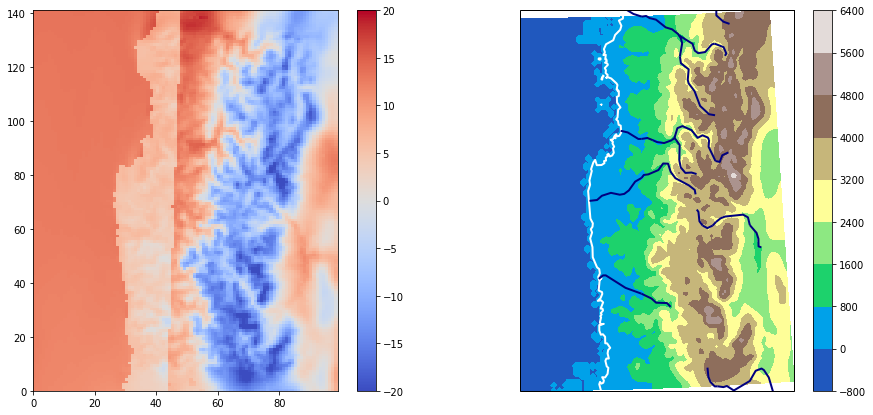

In [46]:
from matplotlib.gridspec import GridSpec

# select the DEM
z = ds['HGT'].isel(Time=0)
# select 2m tempterature at timestep 10
x = ds['T2'].mean('Time')

# initialize a figure
fig = plt.figure(figsize=(15, 7))

# here I'm doing some layout work that's not really necessary for simple plotting, 
# but for my somewhat more complicated example of having one unprojected and one projected plot
gs = GridSpec(1, 2)
ax = fig.add_subplot(gs[0])

# pseudocolor plot without projection
pl = ax.pcolormesh(x.values - 273.15, cmap='coolwarm', vmin=-20, vmax=20)
plt.colorbar(pl, ax=ax)

bx = fig.add_subplot(gs[1], projection=crs.LambertConformal(**cartopy_params(ds)))

# plot a colormesh in projected coordinates
cf = bx.contourf(z.XLONG, z.XLAT, z.values, transform=crs.PlateCarree(), cmap='terrain')
bx.add_geometries(coast, crs.PlateCarree(), facecolor='none', edgecolor='w', linewidth=2)
bx.add_geometries(rivers, crs.PlateCarree(), facecolor='none', edgecolor='navy', linewidth=2)
plt.colorbar(cf, ax=bx)

In [52]:
plt.switch_backend('notebook')
%matplotlib notebook

<IPython.core.display.Javascript object>


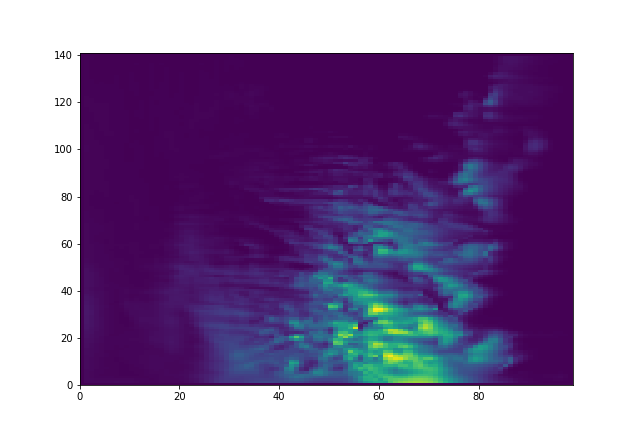

In [53]:
plt.figure()
plt.pcolormesh(ds['RAINNC'].isel(Time=-1))

## Web scraping

In [ ]:
import requests, re
from bs4 import BeautifulSoup as soup
from io import StringIO
import pandas as pd

In [ ]:
r = requests.get('https://earth.boisestate.edu/drycreek/data/lower-gage/')
r.raise_for_status()
s = soup(r.text, 'html.parser')

In [ ]:
# 'typical' solution

empty_list = []

for a in s.find_all('a', {'href': re.compile('HrlySummary')}):
    r = requests.get(a.attrs['href'])
    r.raise_for_status()
    empty_list.append(
        pd.read_csv(StringIO(r.text), skiprows=18, parse_dates=True, index_col='DateTime', na_values=-6999)
    )

df = pd.concat(empty_list)

In [ ]:
# Pythonic

def f(a):
    r = requests.get(a.attrs['href'])
    r.raise_for_status()
    return pd.read_csv(StringIO(r.text), skiprows=18, parse_dates=True, index_col='DateTime', na_values=-6999)

df = pd.concat([f(a) for a in s.find_all('a', {'href': re.compile('HrlySummary')})]).dropna('all', 1)